| Oliver Walton | phys 404 |
| ------------- | :------- |
|Homework       | 7


# Homework:

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 



Initializing
0
0.875
0.15625
0.0546875
0.0234375
0.011444091796875
0.00710296630859375
0.004836559295654297
0.003505110740661621
0.002656723838299513
0.0020830048015341163
10
0.001676967651292216
0.0013790829016215866
0.0011540799136753321
0.0009799799191441139


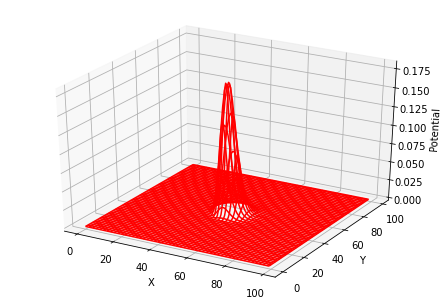

In [13]:
# Part 1
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;

print("Initializing")
omega=1.0   #because the inital guess is close, and the solution is small, large omega's lead to overcorrection
Nmax = 100; Niter = 3000; Rho = zeros((Nmax, Nmax), float)   
G = 1.2
#set initial conditions
Rho[50,50] = 1.0  # Rho=1 @ the center x=50,y=50

for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(Rho[i+1,j]+Rho[i-1,j]+Rho[i,j+1]+Rho[i,j-1])-Rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            Rho[i,j] = Rho[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(Rho):                                         # 4*pi*G*Rho(x, y) 
    z = 4*pi*G*Rho[X,Y]                        
    return z

Z = functz(Rho)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

By graphing this numarical solution alongside 2*G*$\mu$*ln(r)+constant. \
we can check if they are similar

Initializing
0
0.875
0.15625
0.0546875
0.0234375
0.011444091796875
0.00710296630859375
0.004836559295654297
0.003505110740661621
0.002656723838299513
0.0020830048015341163
10
0.001676967651292216
0.0013790829016215866
0.0011540799136753321
0.0009799799191441139


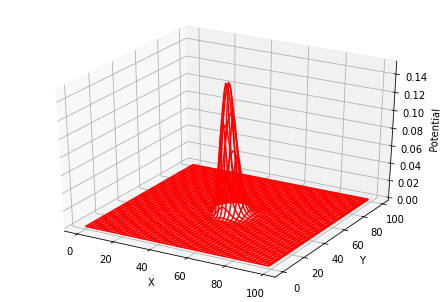

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


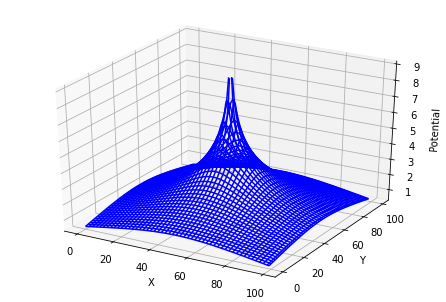

In [77]:
# Part 2
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;

print("Initializing")
omega=1.0   #because the inital guess is close, and the solution is small, large omega's lead to overcorrection
Nmax = 100; Niter = 3000; Rho = zeros((Nmax, Nmax), float)   
G = 1.0
#set initial conditions
Rho[50,50] = 1.0  # Rho=1 @ the center x=50,y=50

for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(Rho[i+1,j]+Rho[i-1,j]+Rho[i,j+1]+Rho[i,j-1])-Rho[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            Rho[i,j] = Rho[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

constant = -9                      # found through trial and error
mew = 1

def functz(Rho):                                         # 4*pi*G*Rho(x, y) 
    z = 4*pi*G*Rho[X,Y]                        
    return z
def func2(r):
    r = sqrt((X-50)**2 + (Y-50)**2)
    d = 2*G*mew*log(r[X,Y]) + constant
    return d

# D = func2(r)
Z = functz(Rho)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
# ax.plot_wireframe(X, Y, D, color = 'b')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

D = func2(r)
# Z = functz(Rho)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
# ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.plot_wireframe(X, Y, -D, color = 'b')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()   

We can see that they do have simular dependencies, however, due to the fact that the second equation goes to infinity at r=0, their scales are quite skewed 